<a href="https://colab.research.google.com/github/FerminMendez/ModuleAI/blob/main/Workshop2_Advanced_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Central limit theorem

2.1 The Uniform Probability Distribution

Nota: Teóricamente el valor esperado es la media teórica de las variables aleatorias de acuerdoa su distrubución de probabilidad.

Por otra parte la varianza de




In [ ]:
pip install symbulate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.2 MB/s eta 0:00:00


2.2 Monte Carlo simulation


In [ ]:
from symbulate import *
#'exec(%matplotlib inline)'
import matplotlib

import matplotlib.pyplot as plt

Simulación de números aleatorios con una distribución normal

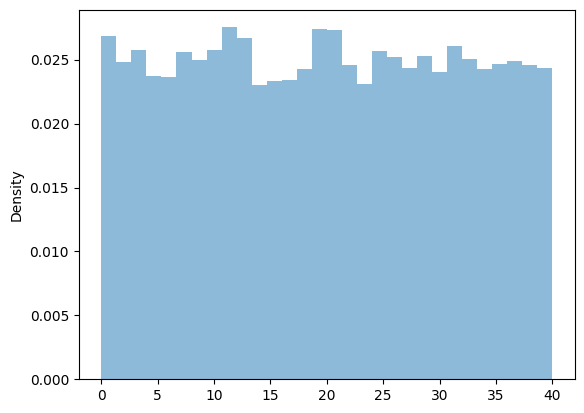

In [ ]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Uniform(0,40)
# Define X as a random variable of the type P (uniform)
X =RV(P)
# Simulate the values of X and save the in the x array:
x=X.sim(10000)
x.plot()
plt.show()

2.2 Reto
Calcular la media y desviación estándar y compararla con las teóricas

Nota: La varianza teórica (b-a)^2/12 es resultado de analizar una variable aleatoria con la teoría de la probabilidad y unas derivadas por ahí :)




In [ ]:
import pandas as pd

array = np.array(x)
df = pd.DataFrame(x)

x_stats=df.describe().T
print(type(x_stats))
print(x_stats)

theoric_mean=(40-0)/2
theoric_var=(40-0)**2/12
theoric_std=(theoric_var)**(1/2)


print("Media real: %2f vs media teórica: %2f"%(x_stats["mean"],theoric_mean))
print("Desviación estándar real: %2f vs desviación estándar teórica: %2f"%(x_stats["std"],theoric_std))




<class 'pandas.core.frame.DataFrame'>
     count       mean        std       min       25%       50%        75%  \
0  10000.0  19.909041  11.550835  0.001383  9.969521  19.91508  29.868654   

         max  
0  39.989481  
Media real: 19.909041 vs media teórica: 20.000000
Desviación estándar real: 11.550835 vs desviación estándar teórica: 11.547005


Hemos encontrado que la media real y la media teórica son casi identicas a las reales.

In [ ]:
# Define the probability space as a vector of 25 uniform random numbers:
P = Uniform(0,40) ** 25
# Define XVECTOR as a vector of random variables with 25 random values
XVECTOR =RV(P)
# Simulate 10,000 vectors to get a matrix
xmatrix=XVECTOR.sim(10000)

In [ ]:
xmatrix


0,"(2.180306827433376, 1.6664072943457109, 32.86335101550791, 25.763694551918988, 1.3148931844492173, ...."
1,"(13.444463893719266, 38.61007752089164, 13.703572543416517, 15.03234858026163, 15.106382615146895, ...."
2,"(7.260728698169547, 38.83369698456803, 24.41803879670145, 9.452005285697505, 2.2174737367866726, ......"
3,"(26.292460735295066, 18.485279865186392, 36.68970212970545, 28.411225581277666, 37.15793964053033, ...."
4,"(14.094316073571985, 38.02256768543534, 32.11814352862713, 16.14353830153022, 1.1252737252456768, ....."
5,"(18.741803325466964, 9.764889520800736, 28.10778931901801, 4.133231171922294, 7.81354001489551, ...,..."
6,"(1.5547159875902716, 22.95861924918369, 22.62421225154947, 30.255342979371463, 18.62167171286172, ....."
7,"(31.313073673351838, 32.80974841546956, 18.777508225861563, 28.496509258400412, 17.296323727224117, ..."
8,"(30.5098017373456, 25.646791430226415, 38.04184407758216, 20.43093818499723, 18.916995446381062, ......"
...,...
9999,"(25.29403950481597, 34.93951137061753, 24.567063077306337, 1.2545824640346126, 2.0814447912639134, ...."


In [ ]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers:
xmean = RV(P,mean).sim(10000)
xmean

0,22.480957860262716
1,22.394684859559952
2,18.127196777945738
3,18.554078542432382
4,22.307820547796595
5,18.528099881796393
6,19.74486067887817
7,20.784348040549343
8,20.105570920952147
...,...
9999,23.393899090620625


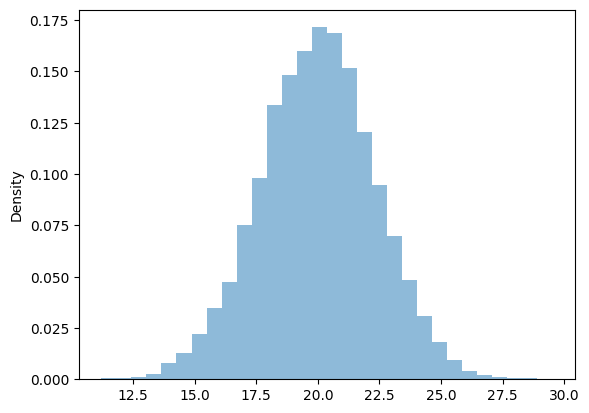

In [ ]:
plt.clf()
xmean.plot()
plt.show()

2.3 Calcular la media y desviación estándar de x_mean y con las de x

In [ ]:
array = np.array(xmean)
df_x_mean = pd.DataFrame(xmean)

xmean_stats=df_x_mean.describe().T
print(type(xmean_stats))
print(xmean_stats)


print("Media xmean: %2f vs media de x: %2f"%(xmean_stats["mean"],x_stats["mean"]))
print("Desviación estándar xmean: %2f vs desviación estándar de x: %2f"%(xmean_stats["std"],x_stats["std"]))

<class 'pandas.core.frame.DataFrame'>
     count     mean       std        min        25%        50%       75%  \
0  10000.0  19.9855  2.338925  11.206577  18.428951  20.004221  21.54582   

         max  
0  29.516486  
Media xmean: 19.985500 vs media de x: 19.909041
Desviación estándar xmean: 2.338925 vs desviación estándar de x: 11.550835


A pesar de que el promedio se mantiene. La desviación estándar se reduce dado el comportamiento normal de los datos. En específico tenemos 2.3 de desviación esperada donde teóricamente con una desviación estándar de 2 tendrémos 95% de los datos. Esto significa que los promedios aleatorios se comportan de manera similar y alrededor de la media teórica. Mejor que los calcúlos aleatorios.


Simulating numbers with the NORMAL probability distribution

2.2.4 Simulando numeros con la distribución de probabilidad normal


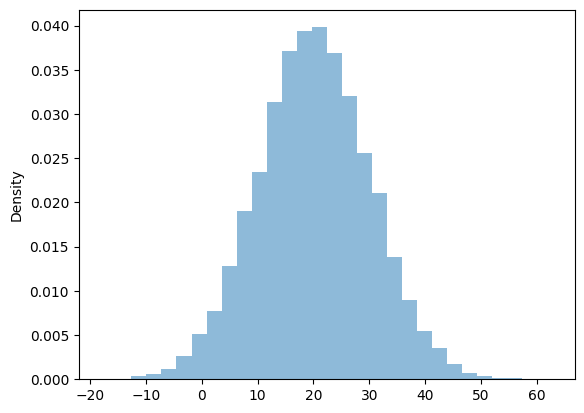

In [ ]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)
# Simulate 10,000 values of Y and save the in the x array:
y=Y.sim(10000)
y.plot()
plt.show()

Graficamos ambos histogramas, los de los datos aleatorios y los promedios de muestras aleatorias. La distribución de los promedios tiene más bien un comportamiento normal.

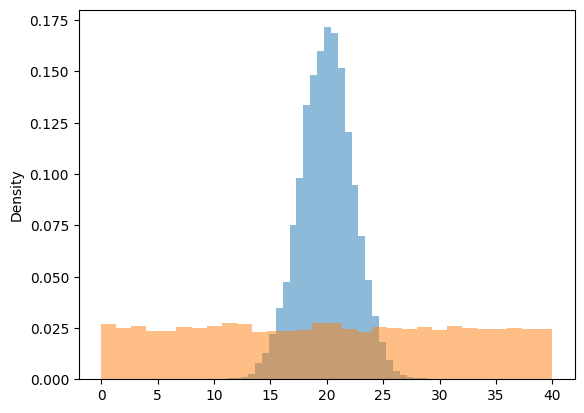

In [ ]:
plt.clf()
xmean.plot()
x.plot()
plt.show()

2.4
Simular los datos con una probabilidad de distribución donde la media es 20 y la desciación estándar de 10

In [ ]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)

# Simulate 10,000 values of Y and save the in the x array:
y=Y.sim(10000)
print(y)

Index Result
0     9.825203019428494
1     -4.051386373853152
2     34.263113179130066
3     37.563224907931556
4     27.280190292867502
5     7.41426413128103
6     16.596559766609683
7     25.901749936624174
8     24.573516740579258
....  .................
9999  7.799109883866031


<Figure size 640x480 with 0 Axes>

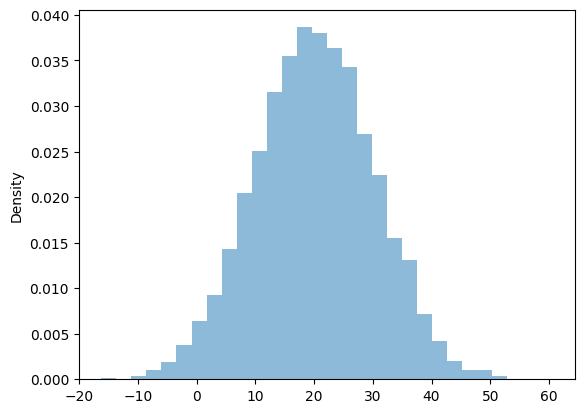

In [ ]:
y.plot()
plt.show()

Calculemos la media y desviación estándar de los datos:


In [ ]:
print(y)
y_mean= 0
y_std=0
print("Datos reales a partir de la función con media 20 y std 10)\n Media real: %2f \n std real: %2f "%(y_mean,y_std))



Index Result
0     9.825203019428494
1     -4.051386373853152
2     34.263113179130066
3     37.563224907931556
4     27.280190292867502
5     7.41426413128103
6     16.596559766609683
7     25.901749936624174
8     24.573516740579258
....  .................
9999  7.799109883866031
Datos reales a partir de la función con media 20 y std 10)
 Media real: 0.000000 
 std real: 0.000000 


2.2.5

Calcular la media y desviación estándar the los datos aleatorios.

CALCULATE THE MEAN AND STANDARD DEVIATION OF THIS RANDOM y VARIABLE. HOW SIMILAR OR DIFFERENT ARE THESE VALUES FROM THE MEAN AND STANDARD DEVIATION OF THE THEORETICAL MEAN (20) AND THE THEORETICAL STANDARD DEVIATION (10)?



REVISAR ESTO MAS TARDE: COMO CALCULAR LA MEDIA Y STD DE Y????

In [ ]:

# Define the probability space P as a vector of 25 normal random numbers:
P = Normal(mean=20, sd=10) ** 25
# Define RANDOMVECTOR as a vector of 25 random variables in the Probability space P
RANDOMVECTOR = RV(P)
# Simulate 10,000 random vectors with this distribution and save the in ymatrix:
ymatrix=RANDOMVECTOR.sim(10000)

In [ ]:
ymatrix

0,"(12.426141720481136, 15.88698048124856, 25.118910970771267, 37.563954191466564, 20.946121354693435, ..."
1,"(24.34363596044591, 3.68817392410962, 30.102832775547906, 29.851107921237862, -2.507468267623679, ....."
2,"(9.060173258469943, 5.780460506770622, 8.85460889880508, 19.066488687800963, 20.873608682275933, ......"
3,"(31.450619602296563, 29.108208478882666, 13.021029085839512, 21.187878114593104, 27.015913782560265,..."
4,"(5.288626051386959, 17.265703411300276, 25.874144301080364, 36.1256245802449, 25.196863645783388, ....."
5,"(22.788725044563954, -0.9803318774727963, 15.562312150001002, 25.472278143004093, 27.260712285401492..."
6,"(-6.416413886748682, 9.651720251544859, 29.719278425498064, 16.035220946911206, 34.55491912777184, ...."
7,"(23.42101141099426, 23.996290261941247, 29.680959265234353, 15.762177123989096, 24.502495006101704, ..."
8,"(16.917831863133777, 9.8999184800201, 34.442238001602036, 24.625284450131893, 22.145901857926177, ....."
...,...
9999,"(28.42241976181439, 28.91886914849035, 32.40398770965688, 11.73156992090085, 34.77923026958834, ...,..."


In [ ]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers:
ymean = RV(P,mean).sim(10000)
ymean

0,19.1560844883773
1,22.01103747968658
2,23.138675899287474
3,18.40758201729904
4,20.674203564824158
5,21.154253051808773
6,16.685883839936817
7,20.393137670984007
8,17.44631166350438
...,...
9999,18.858784191875035


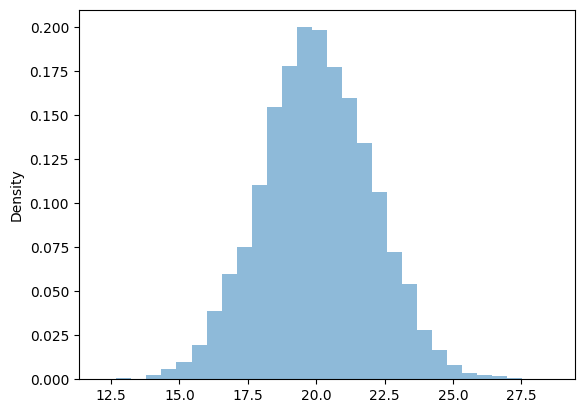

In [ ]:
plt.clf()
ymean.plot()
plt.show()

2.2.6

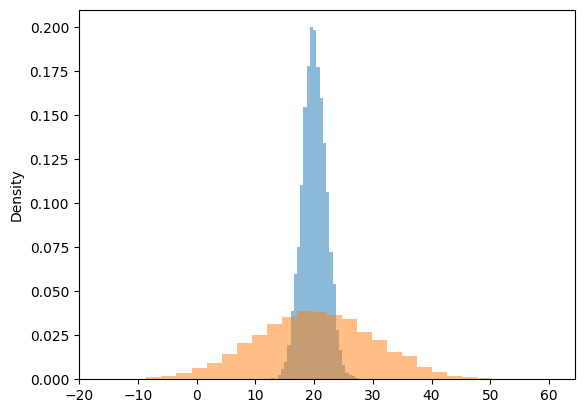

In [ ]:
plt.clf()
ymean.plot()
y.plot()
plt.show()

Notas: La varianza de una suma es la suma de las varianzas. Pero no sucede lo mismo con las desviaciones estándar


**Resumen e importancia del Teorema del limite central**
Nos dice que

*   Dada una muestra aleatoria de datos. Si analizamos cualquier combinación lineal
 (Como promedios ponderados o media aritmetica) los resultados se comportarán de manera normal. Donde los datos se distribuyen en el 68% a +- 1 std, 95% en +-2 std y 99% en +- 3std de la media.
*   Tambien tenemos que la std de la combinación lineal respecto a la std de los datos originales se ve reducida en 1/raiz de n, donde n es el número de datos.



4- Hypothesis testing


Se usa para validar las hipótesis en una investigación. Donde se parte a partir de una hipótesis que quieres validar y una hipótesis nula.

H0: Null Hypótesis (Diablito-> Opuesta a tu hipotesis) Se da por hecho que la hipótesis nula es opuesta de principio

Ha: La hipótesis que quieres demostrar. Se busca reducir la probabilidad de que tu hipótesis esté mal.


Es importante hacer estas pruebas para tener evidencia estadística significativa donde el margen de error comunmente aceptado es del 5%

*   P value: Margen de error de tu hipotesis
*  T value: Número de std que tienes que moverte para llegar al valor de la hipótesis nula.
*   Error estandar es la std de la variable de análisis.

El factor 1/n solo aplica para promedios.





4.1 Calcular el retorno de inversión de Microsoft en los últimos años y determiar si combiene invertir en microsoft


In [ ]:
import yfinance as yf

MSFT=yf.download(tickers="MSFT", start="2019-01-01",interval="1mo")
MSFT

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,99.550003,107.900002,97.199997,104.430000,99.367691,714212800
2019-02-01,103.779999,113.239998,102.349998,112.029999,106.599289,469095900
2019-03-01,112.889999,120.820000,108.800003,117.940002,112.702065,589095800
2019-04-01,118.949997,131.369995,118.099998,130.600006,124.799850,433157700
2019-05-01,130.529999,130.649994,123.040001,123.680000,118.187157,547218800
2019-06-01,123.849998,138.399994,119.010002,133.960007,128.484482,508324300
2019-07-01,136.630005,141.679993,134.669998,136.270004,130.700012,484079900
2019-08-01,137.000000,140.940002,130.779999,137.860001,132.225021,584482000
2019-09-01,136.610001,142.369995,134.509995,139.029999,133.791245,472544800


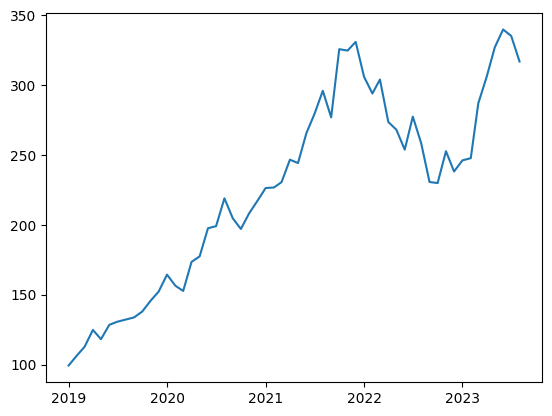

In [ ]:
import matplotlib
from matplotlib.pyplot import*
plot(MSFT["Adj Close"])
show()

In [ ]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2019-01-01 to 2023-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       56 non-null     float64
 1   High       56 non-null     float64
 2   Low        56 non-null     float64
 3   Close      56 non-null     float64
 4   Adj Close  56 non-null     float64
 5   Volume     56 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.1 KB


In [ ]:
MSFT["ccr"] = np.log(MSFT['Adj Close']) - np.log(MSFT['Adj Close'].shift(1))
MSFT["ccr"].describe()


count    55.000000
mean      0.021085
std       0.063262
min      -0.113590
25%      -0.022371
50%       0.022293
75%       0.065100
max       0.162366
Name: ccr, dtype: float64

In [ ]:
mean_ccr= MSFT["ccr"].dropna().mean()
print("Media del ccr:",mean_ccr)
n=MSFT["ccr"].count()
#Standard error
std_crr=MSFT["ccr"].std()
se=std_crr/(n)**(1/2)
print("Desviación estándar:",std_crr)
print("Error estándar:",se)

Media del ccr: 0.021085384504285445
Desviación estándar: 0.06326153048259665
Error estándar: 0.008530183030116172


En principio tenemos que el ccr se entre cada mes en el 95 % de los casos varía entre perder el %10 de las ganancias o ganar hasta un 14%.
Por otra parte el promedio se mantiene en 0.2 y la error estándar es del 0.008. Dado que el promedio es una combianición lineal e valores aleatorios se comporta de manera normal. Gracias al teorema de limite central podemos identificar que los promedios mensuales de Microsoft varian 0.020+-0.16 aproximadamente en el 95% de los casos. Es decir, que con los datos generado durante los últimos 5 años.


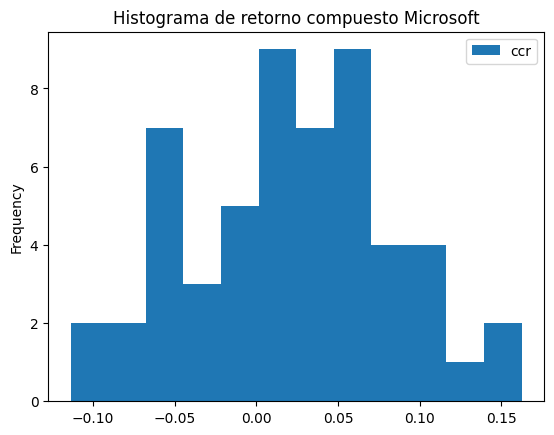

In [ ]:
R_MSFT= pd.DataFrame(MSFT[["ccr"]])
hist=R_MSFT.plot.hist(bins=12,title="Histograma de retorno compuesto Microsoft")


En principio queremos indagar si el promedio de los retornos mensuales son mayores a 0.
Ho= El promedio de los retornos de inversión continuos son menores o igualaes a 0 RCC_mean<=0
Ha= Ho= El promedio de los retornos de inversión continuos son menores o iguales a 0 RCC_mean>0



Ahora bien, el interválo de confianza del 95% es la media más menos dos desviaciones estándar. Es decir que el promedio de las ganancias de Microsoft estará entre 0.004 y 0.036

In [ ]:
t=mean_ccr/se
t

2.4718560469151254

En esta caso no llega a 3, pero supera el dos. Quiere decir que está entre 1% y 5% de que falle.
